   Fruit  Weight (grams)         Color  Diameter (cm)
0  Apple             150   Light Green            7.0
1  Apple             160    Dark Green            6.8
2  Apple             145           Red            6.5
3  Apple             155  Yellow Green            7.1
4  Apple             170      Dark Red            7.2


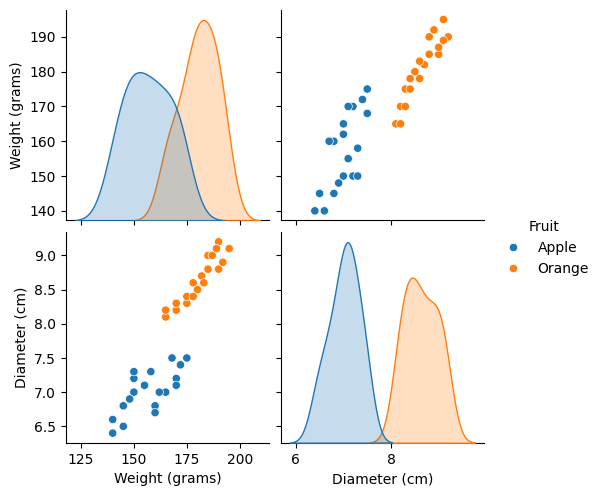

In [22]:
# Read data in a csv and plot them on a graph to see their visual representations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('apple_orange_dataset.csv')

# Display the first few rows of the dataset to confirm it's loaded correctly
print(data.head())

# Visualize the data using a pair plot, with 'Fruit' as the target class
sns.pairplot(data, hue='Fruit')
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder
# Preprocessing: Convert categorical 'Color' and 'Fruit' to numerical using LabelEncoder
label_encoder_fruit = LabelEncoder()
label_encoder_color = LabelEncoder()

data['Fruit'] = label_encoder_fruit.fit_transform(data['Fruit'])  # Target variable
data['Color'] = label_encoder_color.fit_transform(data['Color'])  # Feature
data.head()

,Fruit,Weight (grams),Color,Diameter (cm)
0,0,150,3,7.0
1,0,160,0,6.8
2,0,145,7,6.5
3,0,155,8,7.1
4,0,170,2,7.2


In [25]:
# Train & test split the data into 80-20.
from sklearn.model_selection import train_test_split

X = data[['Weight (grams)', 'Color', 'Diameter (cm)']]  # Features
y = data['Fruit']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train the model
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

Accuracy of the SVM model: 100.00%


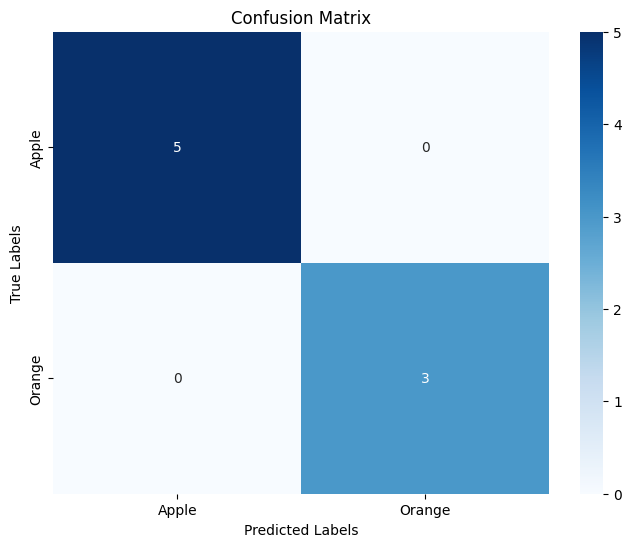

In [38]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_fruit.classes_, yticklabels=label_encoder_fruit.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

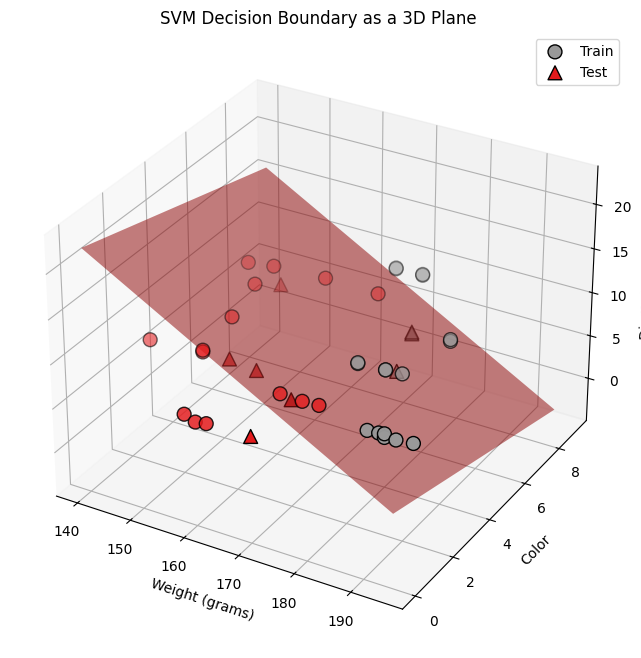

In [52]:
# Create a grid for Weight and Color (the first two features)
weight_range = np.linspace(X_train['Weight (grams)'].min(), X_train['Weight (grams)'].max(), 50)
color_range = np.linspace(X_train['Color'].min(), X_train['Color'].max(), 50)

# Create mesh grids for Weight and Color
W, C = np.meshgrid(weight_range, color_range)

# Calculate corresponding Diameter values (decision boundary)
# Using the decision function to find the corresponding third dimension
D = (-svm_model.intercept_[0] - 
     svm_model.coef_[0][0] * W - 
     svm_model.coef_[0][1] * C) / svm_model.coef_[0][2]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary plane as a surface
ax.plot_surface(W, C, D, alpha=0.5, color='red', rstride=100, cstride=100)

# Plot training points in 3D
scatter_train = ax.scatter(X_train['Weight (grams)'], X_train['Color'], X_train['Diameter (cm)'],
                            c=y_train, cmap=plt.cm.Set1, s=100, edgecolor='k', label="Train")

# Plot test points in 3D
scatter_test = ax.scatter(X_test['Weight (grams)'], X_test['Color'], X_test['Diameter (cm)'],
                           c=y_test, cmap=plt.cm.Set1, s=100, edgecolor='k', marker='^', label="Test")

# Set axis labels and title
ax.set_xlabel('Weight (grams)')
ax.set_ylabel('Color')
ax.set_zlabel('Diameter (cm)')
plt.title('SVM Decision Boundary as a 3D Plane')

# Show legend
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


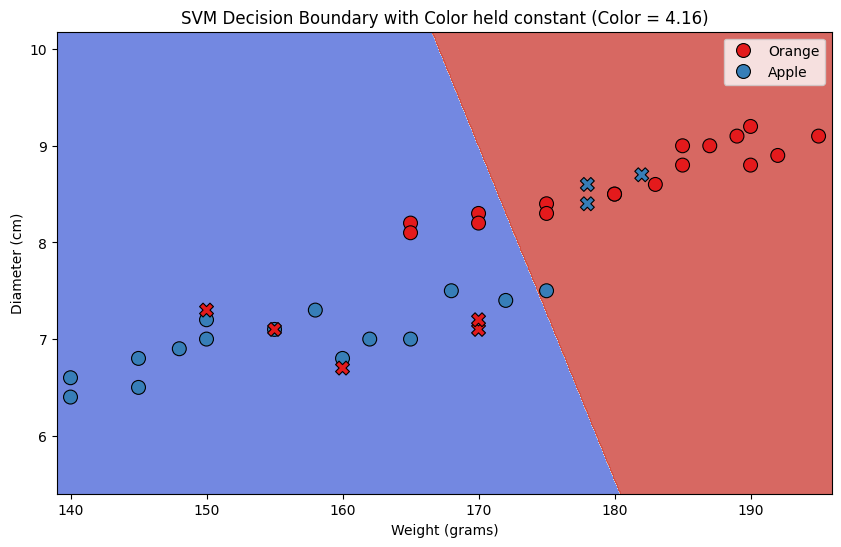

In [49]:
color_value = X_train['Color'].mean()  # You can use mean, median, or a specific value

# Create a mesh grid for plotting decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X_train['Weight (grams)'].min() - 1, X_train['Weight (grams)'].max() + 1
y_min, y_max = X_train['Diameter (cm)'].min() - 1, X_train['Diameter (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid, with 'Color' held constant
Z = svm_model.predict(np.c_[xx.ravel(), np.full(xx.ravel().shape, color_value), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot training points (we plot based on the two features we are visualizing)
sns.scatterplot(x=X_train['Weight (grams)'], y=X_train['Diameter (cm)'], hue=label_encoder_fruit.inverse_transform(y_train),
                palette='Set1', s=100, edgecolor='k', legend=True)

# Plot test points with a different marker
sns.scatterplot(x=X_test['Weight (grams)'], y=X_test['Diameter (cm)'], hue=label_encoder_fruit.inverse_transform(y_test),
                palette='Set1', s=100, edgecolor='k', marker='X', legend=False)

plt.title(f'SVM Decision Boundary with Color held constant (Color = {color_value:.2f})')
plt.xlabel('Weight (grams)')
plt.ylabel('Diameter (cm)')
plt.legend(loc='best')
plt.show()